In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate "sparse" vector with explicit zeros--dense is find with <10k entries
import scipy.stats

mean = 3    # All nonzero samples have the same stdev
vectorSize = 100
nonSparseEvery = 8 
theta = np.zeros(vectorSize)

for j in range(vectorSize):
    if j % nonSparseEvery == 0:
        theta[j] = mean

In [3]:
ys = np.zeros(vectorSize)
for j in range(vectorSize):
    ys[j] = scipy.stats.norm.rvs(theta[j])

In [4]:
def soft_thresh(y, lam):
    return np.sign(y) * np.maximum(np.absolute(y) - lam, np.zeros(np.shape(y)))

In [5]:
thetaEstimates = []
lambdas = [1e-4, 1e-3, 1e-2, 0.1, 1.0, 2.0]
for lam in lambdas:
    thetaEstimates.append(soft_thresh(ys,lam))
    

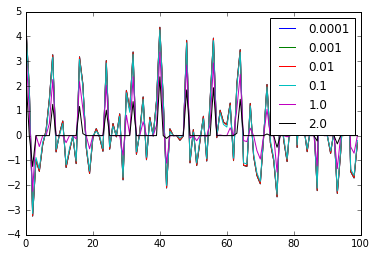

In [6]:
colors = "bgrcmk"
color_index = 0

for x in range(len(lambdas)):
    plt.plot(range(vectorSize), thetaEstimates[x], c=colors[x % len(colors)], label=str(lambdas[x]))

plt.legend()
plt.show()
    
## Notice how the black line and yellow lines are much more sparse than the others

In [7]:
errors = []
for x in range(len(lambdas)):
    diff = thetaEstimates[x] - theta
    err = np.mean(np.square(diff))
    errors.append(err)

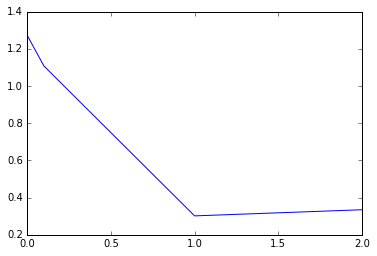

In [8]:
plt.plot(lambdas, errors)
plt.show()